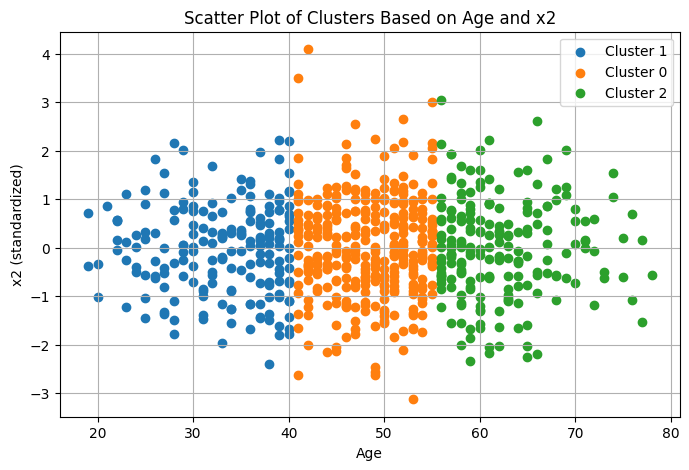

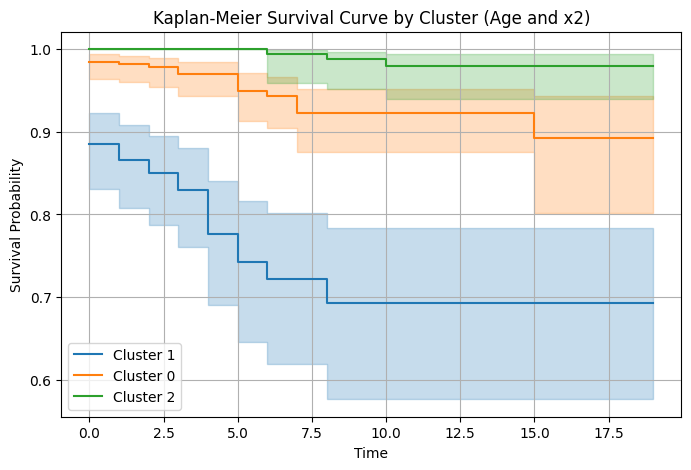

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, CoxPHFitter
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv("data_censored.csv")

# Define column names (ensure these match your dataset!)
duration_col = "period"  # Replace with actual time column name
event_col = "censored"   # Replace with actual event column (1=event occurred, 0=censored)

# Check column names
if duration_col not in df.columns or event_col not in df.columns:
    raise ValueError(f"ERROR: Column names are incorrect! Check: {df.columns}")

# Convert to numeric (if necessary)
df[duration_col] = pd.to_numeric(df[duration_col], errors="coerce")
df[event_col] = pd.to_numeric(df[event_col], errors="coerce")

# Standardize the x2 column
scaler = StandardScaler()
df['x2'] = scaler.fit_transform(df[['x2']])

# Remove duplicate rows
df = df.drop_duplicates()

# Clustering based on age and x2
n_clusters = 3  # Adjust the number of clusters as needed
kmeans_age_x2 = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster_age_x2'] = kmeans_age_x2.fit_predict(df[['age', 'x2']])

# Check the number of distinct clusters found for age and x2
distinct_clusters_age_x2 = len(np.unique(df['cluster_age_x2']))
if distinct_clusters_age_x2 < n_clusters:
    print(f"Warning: Number of distinct clusters ({distinct_clusters_age_x2}) found smaller than n_clusters ({n_clusters}).")
    # Reduce the number of clusters to the number of distinct clusters found
    n_clusters = distinct_clusters_age_x2
    kmeans_age_x2 = KMeans(n_clusters=n_clusters, random_state=42)
    df['cluster_age_x2'] = kmeans_age_x2.fit_predict(df[['age', 'x2']])

# Scatter plot of clusters based on age and x2
plt.figure(figsize=(8, 5))
for cluster in df['cluster_age_x2'].unique():
    cluster_data = df[df['cluster_age_x2'] == cluster]
    plt.scatter(cluster_data['age'], cluster_data['x2'], label=f'Cluster {cluster}')
plt.title("Scatter Plot of Clusters Based on Age and x2")
plt.xlabel("Age")
plt.ylabel("x2 (standardized)")
plt.legend()
plt.grid()
plt.show()

# Kaplan-Meier Survival Analysis by Cluster for age and x2
kmf = KaplanMeierFitter()
plt.figure(figsize=(8, 5))
for cluster in df['cluster_age_x2'].unique():
    cluster_data = df[df['cluster_age_x2'] == cluster]
    kmf.fit(cluster_data[duration_col], event_observed=cluster_data[event_col], label=f'Cluster {cluster}')
    kmf.plot_survival_function()

plt.title("Kaplan-Meier Survival Curve by Cluster (Age and x2)")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.grid()
plt.show()